# Genera i GRAFI

In [14]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from Graph_generator import Graph_Generator
import utilities

n_graphs = 300

# 20 permutations
gg = Graph_Generator(n_graphs=n_graphs,
                     degree = 4)
g1, na1, ea1 = gg.generate(28,10,10,1)
g2, na2, ea2 = gg.generate(28,10,10,10)

graphs, labels = gg.generate_set(g1,g2,na1, ea1,na2, ea2,12,12,plot=False)

functions = [utilities.degree,utilities.clust_coefficient,utilities.local_degree_profile]
graphs = utilities.add_info_to_nodes(graphs,functions)

max_n_nodes, n_attributes = utilities.find_shapes(graphs)

n_classes = 2


In [8]:
def gen_tmp(max_n_nodes,n_attributes,n_classes):
    
    ##### GNN  + autoencoder
    my_GNN = generate_GNN(max_n_nodes,n_attributes,n_classes,
                           batch_size=32,
                           validation_split=0.2,
                           verbose=0,
                           epochs=200)
    m_1 = Transformer(my_GNN)

    my_scaler = preprocessing_scaler([-0.5, 0.5])
    my_Autoencoder = generate_transormer_autoencoder(batch_size=32,
                                                    validation_split=0.2,
                                                    epochs=140, 
                                                    verbose=0,
                                                    scaler=my_scaler,
                                                    dim = dim)

    m_2 = Transformer(my_Autoencoder)
    
    
    
    return(m_1,m_2)
    

In [9]:
from embedder import Transformer
from embedder import Embedder
from sklearn.decomposition import TruncatedSVD


times = 5
dim = [2]
n_classes = 2


m_1,m_2 = gen_tmp(max_n_nodes,n_attributes,n_classes)
emb_0 = Embedder([m_1,m_2], name="Spketral 128 - Autoencoder denso1")





emb = [emb_0]
print("done")

done


	 iteration n: 1
	 	 dim:  2
	 	 	  Spketral 128 - Autoencoder denso1
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
reset state AUTOENCODER
epochs GNN
129


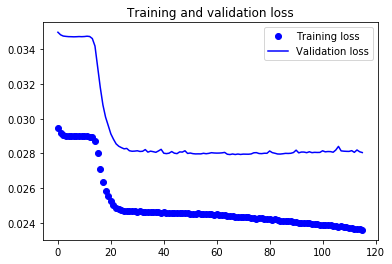

0.029477509669959545
0.023583311454526017
	 	 	  Spektral 128 + Truncate SVD
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
epochs GNN
92
	 iteration n: 2
	 	 dim:  2
	 	 	  Spketral 128 - Autoencoder denso1
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
reset state AUTOENCODER
epochs GNN
60


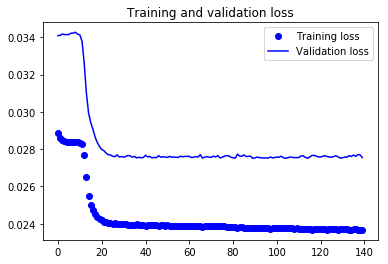

0.028877683782151768
0.023667629276003157
	 	 	  Spektral 128 + Truncate SVD
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
epochs GNN
83
	 iteration n: 3
	 	 dim:  2
	 	 	  Spketral 128 - Autoencoder denso1
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
reset state AUTOENCODER
epochs GNN
113


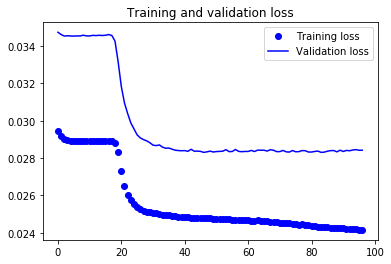

0.029422546470803872
0.024152306440685476
	 	 	  Spektral 128 + Truncate SVD
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
epochs GNN
96
	 iteration n: 4
	 	 dim:  2
	 	 	  Spketral 128 - Autoencoder denso1
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
reset state AUTOENCODER
epochs GNN
171


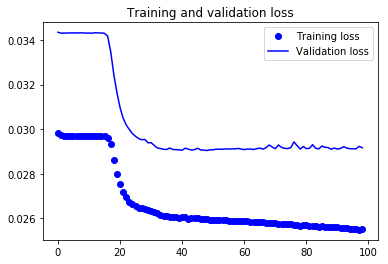

0.029839803730802878
0.025477735192648003
	 	 	  Spektral 128 + Truncate SVD
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
epochs GNN
130
	 iteration n: 5
	 	 dim:  2
	 	 	  Spketral 128 - Autoencoder denso1
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
reset state AUTOENCODER
epochs GNN
164


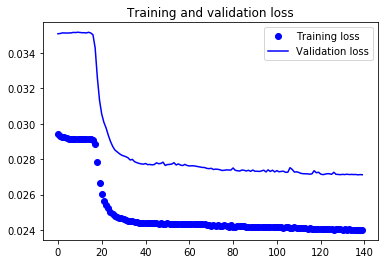

0.02942499877618892
0.024002708893801485
	 	 	  Spektral 128 + Truncate SVD
reset state TRANSFORMER
reset state GNN
reset state TRANSFORMER
epochs GNN
149


In [10]:
vis = utilities.repeat_n_times(graphs, labels, emb, dim, times,test_size=0.3,seed = 11)

True

In [3]:
from keras import losses
from keras.optimizers import RMSprop
from keras.initializers import RandomNormal


def generate_autoencoder(n_components):
     
    #autoencoder
    iniz = RandomNormal(mean=0.0, stddev=0.1)

    X_in = Input(shape=(128,))
    dense_64 = Dense(64, activation='relu',kernel_initializer=iniz)(X_in)
    dense_16 = Dense(16, activation='relu',kernel_initializer=iniz)(dense_64)
    dense_8 = Dense(8, activation='relu',kernel_initializer=iniz)(dense_16)

    #dense_x = Dense(n_components, activation='softmax',kernel_initializer=iniz)(dense_8)
    dense_x = Dense(n_components, activation='softmax',kernel_initializer=iniz)(dense_8)

    dense_8_2 = Dense(8, activation='relu',kernel_initializer=iniz)(dense_x)
    dense_16_2 = Dense(16, activation='relu',kernel_initializer=iniz)(dense_8_2)
    dense_64_2 = Dense(64, activation='relu',kernel_initializer=iniz)(dense_16_2)
    out = Dense(128,  activation='relu',kernel_initializer=iniz)(dense_64_2)

    model = Model(inputs=X_in, outputs=out)
    model.compile(optimizer=RMSprop(), loss=losses.mean_squared_error)

    
    
    #encoder
    
    X_in_enc = Input(shape=(128,))

    dense_64_enc = Dense(64, activation='relu')(X_in_enc)
    dense_16_enc = Dense(16, activation='relu')(dense_64_enc)
    dense_8_enc = Dense(8, activation='relu')(dense_16_enc)
    
    #dense_x_enc = Dense(n_components, activation='softmax')(dense_8_enc)
    dense_x_enc = Dense(n_components, activation='relu')(dense_8_enc)

    model_enc = Model(inputs=[X_in_enc], outputs=dense_x_enc)
    model_enc.compile(optimizer=RMSprop(), loss=losses.mean_squared_error)
    
    return (model, model_enc)

def generate_transormer_autoencoder(batch_size,validation_split,epochs,verbose=0,scaler = None,dim=[2,3,5]):
    
    autoencoder = []
    encoder = []
    for d in dim:
        
        a, e = generate_autoencoder(d)
        
        autoencoder.append(a)
        encoder.append(e)
        
   
    transf = Transformer_autoencoder(autoencoder,encoder,batch_size,validation_split,epochs,verbose,scaler)
    
    return(transf)
    


In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


class preprocessing_scaler:
    
    def __init__(self,feature_range):
        
        self.feature_range = feature_range
        self.scaler = MinMaxScaler(copy=True, feature_range=(feature_range[0],feature_range[1]))
              
        
    def fit(self,x):
        self.scaler.fit(x)    
        return(self)
    
    
    def transform(self,x):
        return(self.scaler.transform(x))
    
    
class Transformer_autoencoder:
    
    def __init__(self, autoencoders, encoders ,batch_size,validation_split,epochs,verbose=0,scaler=None,dim=[2,3,5]):
        
        self.autoencoders = autoencoders
        self.encoders = encoders
        
        self.batch_size = batch_size
        self.validation_split = validation_split
        self.epochs = epochs
        self.verbose = verbose
        
        if (scaler != None):
            self.scaler = scaler
        
        
        self.dim = dim
        self.selected_model = 0
        self.n_components = 0
        
        self.origina_weights = []
        
        for auto in autoencoders:
            self.origina_weights.append(auto.get_weights())
        
    
    def reset_state(self):
        print ("reset state AUTOENCODER")
        for i in range(len(self.autoencoders)):
            self.autoencoders[i].set_weights(self.origina_weights[i])
        
        
    
    def fit(self,x,_):
        
        self.selected_model = self.dim.index(self.n_components)
        
        
        ##### preprocessing inpuu
        if (self.scaler != None):
            x = self.scaler.fit(x).transform(x)
            
        # callback
        es_callback = EarlyStopping(monitor='val_loss', patience=50)
        
        
        model_history = self.autoencoders[self.selected_model].fit(x,x,
                                                    batch_size=self.batch_size,
                                                    validation_split=self.validation_split,
                                                    epochs=self.epochs,
                                                    verbose=self.verbose,
                                                    callbacks=[es_callback])
        
        loss = model_history.history['loss']
        
        val_loss = model_history.history['val_loss']
        epochs = range(len(loss))
        plt.figure()
        plt.plot(epochs, loss, 'bo', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()

        print(np.max(loss))
        print(np.min(loss))

        
        self.encoders[self.selected_model].set_weights(self.autoencoders[self.selected_model].get_weights())
        
        return(self)
        
    def transform(self,x):
       
        if (self.scaler != None):
            x = self.scaler.transform(x)
        
        return(self.encoders[self.selected_model].predict(x))
                             

In [5]:
from embedder import Transformer_GNN
from spektral.datasets import delaunay
from spektral.layers import GraphAttention, GlobalAttentionPool
from spektral.utils import localpooling_filter
from keras.layers import Input, Dense, Reshape, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2


def generate_GNN(max_n_nodes,n_attributes,n_classes,batch_size = 32,validation_split = 0.1,epochs = 100,verbose=0):
    

    learning_rate = 0.001
    l2_reg = 5e-4  

    ##### DEFINISCI MODELLO ORIGINALE
    X_in_1_1 = Input(shape=(max_n_nodes, n_attributes))
    filter_in_1_1 = Input((max_n_nodes, max_n_nodes))
    gc1_1_1 = GraphAttention(32, activation='relu', kernel_regularizer=l2(l2_reg))([X_in_1_1, filter_in_1_1])
    gc2_1_1 = GraphAttention(32, activation='relu', kernel_regularizer=l2(l2_reg))([gc1_1_1, filter_in_1_1])
    pool_1_1 = GlobalAttentionPool(128)(gc2_1_1)
    output_1_1 = Dense(n_classes, activation='softmax')(pool_1_1)
    model_1_1 = Model(inputs=[X_in_1_1, filter_in_1_1], outputs=output_1_1)
    optimizer = Adam(lr=learning_rate)
    model_1_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])


    ##### CREA IL SECONDO MODELLO
    X_in_1_2 = Input(shape=(max_n_nodes, n_attributes))
    filter_in_1_2 = Input((max_n_nodes, max_n_nodes))
    gc1_1_2 = GraphAttention(32, activation='relu', kernel_regularizer=l2(l2_reg))([X_in_1_2, filter_in_1_2])
    gc2_1_2 = GraphAttention(32, activation='relu', kernel_regularizer=l2(l2_reg))([gc1_1_2, filter_in_1_2])
    pool_1_2 = GlobalAttentionPool(128)(gc2_1_2)
    model_1_2 = Model(inputs=[X_in_1_2, filter_in_1_2], outputs=pool_1_2)
    model_1_2.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['acc'])


    my_GNN_1 = Transformer_GNN(original_model = model_1_1,
                                      new_model = model_1_2,
                                      batch_size = batch_size,
                                      validation_split = validation_split,
                                      epochs = epochs,
                                      verbose=verbose)
    
    
    return(my_GNN_1)



In [6]:
from sklearn.model_selection import train_test_split
from visualizator import Visualizator
from evaluator import Evaluator
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=0.2)
vis = Visualizator([2,3,5], n_classifiers = 1, models_names="models_names")

In [144]:


emb_1.estimators[-1].estimator.n_components = 3
X_res = emb_1.fit(X_train,y_train).transform(X_test)


0
fit_scaler
transform scaler
transform scaler


In [145]:
X_res

array([[-0.        ,  0.70785624,  0.7681226 ],
       [ 0.12126388, -0.        , -0.        ],
       [ 0.09397901, -0.        , -0.        ],
       [ 0.02647259,  0.07942456,  0.06555309],
       [ 0.13588457, -0.        , -0.        ],
       [-0.        ,  0.8258257 ,  0.90020907],
       [-0.        ,  0.47185212,  0.5060867 ],
       [-0.        ,  0.72027427,  0.78125554],
       [-0.        ,  0.75237375,  0.8201967 ],
       [ 0.01001769,  0.23499951,  0.24439426],
       [-0.        ,  0.8526797 ,  0.9368901 ],
       [ 0.06567366,  0.00395311,  0.00321948],
       [ 0.00887891,  0.24774013,  0.2503474 ],
       [-0.        ,  0.4595983 ,  0.49061897],
       [ 0.06502487,  0.01691046,  0.00432449],
       [-0.        ,  0.63240606,  0.6888017 ],
       [ 0.09321084, -0.        , -0.        ],
       [ 0.16876999, -0.        , -0.        ],
       [ 0.03216559,  0.08263733,  0.06631287],
       [ 0.0806554 ,  0.00354009,  0.00227836]], dtype=float32)

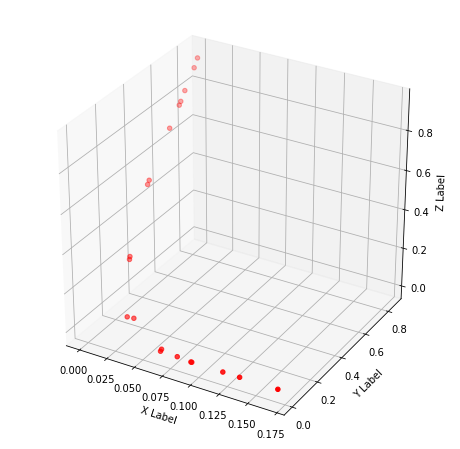

In [146]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_res[:,0],X_res[:,1],X_res[:,2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
